In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

In [5]:
df.sample(10)

# season: season (1: spring, 2: summer, 3: fall, 4: winter)
# holiday: whether day is a holiday or not
# workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
# weather:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp: temperature in Celsius
# atemp: feeling temperature in Celsius
# humidity: humidity
# windspeed: wind speed
# casual: count of casual users
# registered: count of registered users
# count: count of total rental bikes including both casual and registered

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6043,2012-02-08 01:00:00,1,0,1,1,11.48,13.635,61,11.0014,1,9,10
5124,2011-12-07 14:00:00,4,0,1,3,18.04,21.970,100,12.9980,1,24,25
6742,2012-03-18 05:00:00,1,0,0,2,16.40,20.455,94,7.0015,0,6,6
3113,2011-07-18 15:00:00,3,0,1,1,34.44,40.150,53,22.0028,53,111,164
8115,2012-06-18 12:00:00,2,0,1,3,22.96,26.515,78,8.9981,29,139,168
2803,2011-07-05 17:00:00,3,0,1,1,33.62,37.880,46,7.0015,79,466,545
4260,2011-10-09 13:00:00,4,0,0,1,27.06,31.060,44,6.0032,225,193,418
3537,2011-08-17 07:00:00,3,0,1,1,27.06,31.060,65,6.0032,12,296,308
7301,2012-05-03 14:00:00,2,0,1,1,26.24,30.305,65,12.9980,33,171,204
10426,2012-11-19 20:00:00,4,0,1,2,15.58,19.695,62,16.9979,7,252,259


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info(memory_usage = 'deep')

# There are no missing values
# All the formats are appropriate except for 'datetime'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.7 MB


In [ ]:
df.describe()

# Insights
# There aren't many outliers in the dataset except for columns 'casual', 'registered' and 'count'.'
# Mean temperature is around 20°C with max temp of 41°C and minimum temp of close to 0°C.
# Mean humidity is around 62 with max humidity of 100 and minimum humidity of 0.
# Mean windspeed is around 12 with max windspeed of almost 57 and minimum windspeed of 0.
# On an average, on any given day, a total of 145 rental bikes are used which can go from a mimimum of 1 bike to 977 bikes.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isna().sum()

# No null values in the dataset

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Convert 'datetime' column from object to datetime datatype
df['datetime'] =  pd.to_datetime(df['datetime'], infer_datetime_format=True)

In [ ]:
# Creating a new column day_type to distinguish Weekday, Weekend and Holiday
# Logic:
# Holiday  Weekday
#     0     0  -> Weekend (If it's neither a holiday nor a weekday, it has to be a weekend)
#     0     1  -> Weekday
#     1     0  -> Holiday
df['day_type'] = ''
df.loc[(df['holiday'] == 1) & (df['workingday'] == 0), 'day_type'] = 'Holiday'
df.loc[(df['holiday'] == 0) & (df['workingday'] == 0), 'day_type'] = 'Weekend'
df.loc[(df['holiday'] == 0) & (df['workingday'] == 1), 'day_type'] = 'Weekday'

In [ ]:
# Imputing logical values for season
df.loc[(df['season'] == 1), 'season'] = 'Spring'
df.loc[(df['season'] == 2), 'season'] = 'Summer'
df.loc[(df['season'] == 3), 'season'] = 'Fall'
df.loc[(df['season'] == 4), 'season'] = 'Winter'

In [ ]:
# Imputing logical values for weather
df.loc[(df['weather'] == 1), 'weather'] = 'Clear/Partly_Cloudy'
df.loc[(df['weather'] == 2), 'weather'] = 'Mist/Cloudy'
df.loc[(df['weather'] == 3), 'weather'] = 'Light_Rain/Snow'
df.loc[(df['weather'] == 4), 'weather'] = 'Heavy_Rain/Thunderstorm'

In [ ]:
# Strip date and time separately for analysis
df['date'] = pd.to_datetime(df['datetime']).dt.date
df['time'] = pd.to_datetime(df['datetime']).dt.time

##Non-Graphical Analysis


---

In [ ]:
# To check unique values in the columns
for i in df.columns:
  if i in ('season', 'holiday', 'workingday', 'weather', 'day_type'):
    print(i)
    print('-------------')
    print('Total unique values :', df[i].nunique())
    print(df[i].unique())
    print()

season
-------------
Total unique values : 4
['Spring' 'Summer' 'Fall' 'Winter']

holiday
-------------
Total unique values : 2
[0 1]

workingday
-------------
Total unique values : 2
[0 1]

weather
-------------
Total unique values : 4
['Clear/Partly_Cloudy' 'Mist/Cloudy' 'Light_Rain/Snow'
 'Heavy_Rain/Thunderstorm']

day_type
-------------
Total unique values : 3
['Weekend' 'Weekday' 'Holiday']



In [ ]:
# To check distribution of values in the columns 
for i in df.columns:
  if i in ('season', 'holiday', 'workingday', 'weather', 'day_type'):
    print(i)
    print('-------------')
    print(df[i].value_counts(normalize = True))
    print()

# Observations
# Values in the dataset are equally distributed across seasons.
# 92% of the sample data is captured for either clear or mist + cloudy weather. Only 8% of the data is for rainy/snowy weather
# 68% of the data is for weekday, around 29% for weekends and just around 3% for holidays

season
-------------
Winter    0.251148
Summer    0.251056
Fall      0.251056
Spring    0.246739
Name: season, dtype: float64

holiday
-------------
0    0.971431
1    0.028569
Name: holiday, dtype: float64

workingday
-------------
1    0.680875
0    0.319125
Name: workingday, dtype: float64

weather
-------------
Clear/Partly_Cloudy        0.660665
Mist/Cloudy                0.260334
Light_Rain/Snow            0.078909
Heavy_Rain/Thunderstorm    0.000092
Name: weather, dtype: float64

day_type
-------------
Weekday    0.680875
Weekend    0.290557
Holiday    0.028569
Name: day_type, dtype: float64



##Visual Analysis


---



Univariate and Bivariate Analysis

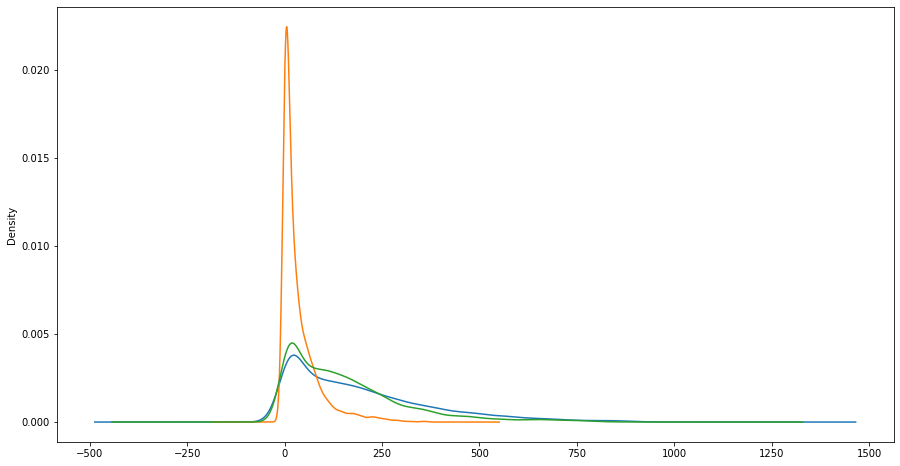

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))

df['count'].plot(kind = 'kde')
df['casual'].plot(kind = 'kde')
df['registered'].plot(kind = 'kde')

plt.show()

# Insights
# Distribution of count of rental bikes peaks in the range [0, 100]

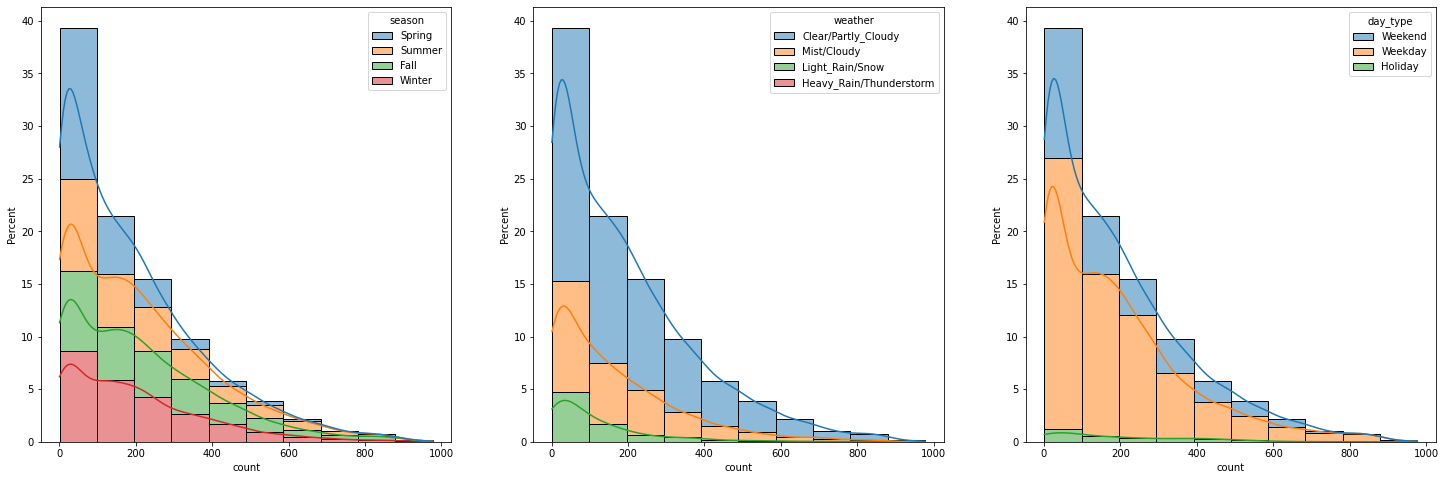

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (25,8))

sns.histplot(data=df, x = 'count', hue = 'season', multiple = 'stack', stat = 'percent', kde= True, bins = 10, ax = ax[0])
sns.histplot(data=df, x = 'count', hue = 'weather', multiple = 'stack', stat = 'percent', kde= True, bins = 10, ax = ax[1])
sns.histplot(data=df, x = 'count', hue = 'day_type', multiple = 'stack', stat = 'percent', kde= True, bins = 10, ax = ax[2])

plt.show()

# Insights
# Distribution of count of rental bikes (right skewed) is not much affected by season, weather and day type. 

<Figure size 576x432 with 0 Axes>

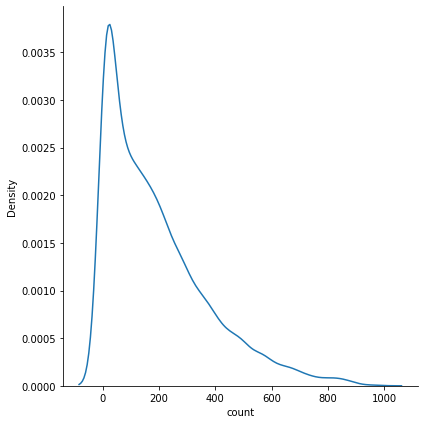

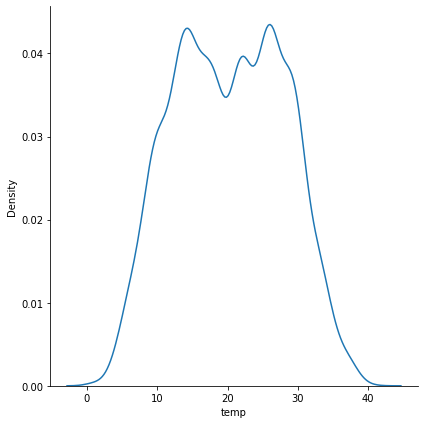

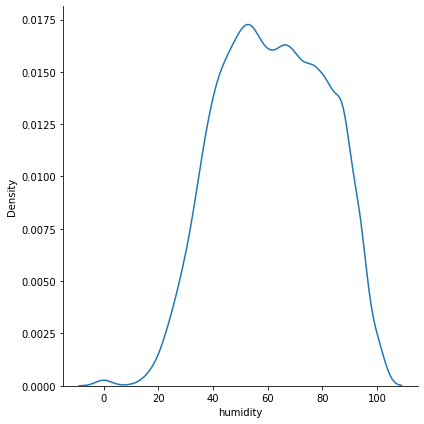

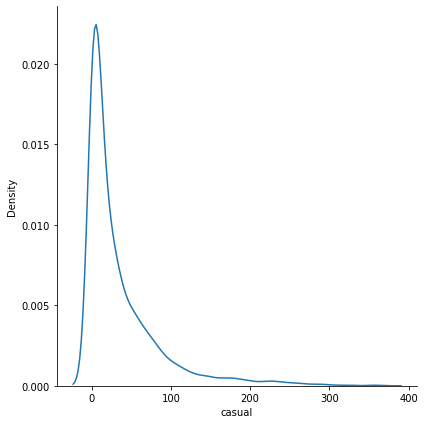

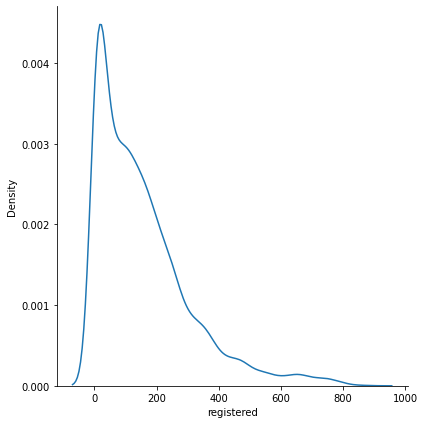

In [ ]:
fig = plt.figure() 
fig.set_size_inches(8, 6)

sns.displot(data = df, x = 'count',kind = 'kde', height = 6, aspect = 1)
sns.displot(data = df, x = 'temp',kind = 'kde', height = 6, aspect = 1)
sns.displot(data = df, x = 'humidity',kind = 'kde', height = 6, aspect = 1)
sns.displot(data = df, x = 'casual',kind = 'kde', height = 6, aspect = 1)
sns.displot(data = df, x = 'registered',kind = 'kde', height = 6, aspect = 1)

plt.show()

# Insights
# count, casual and registered are right skewed.

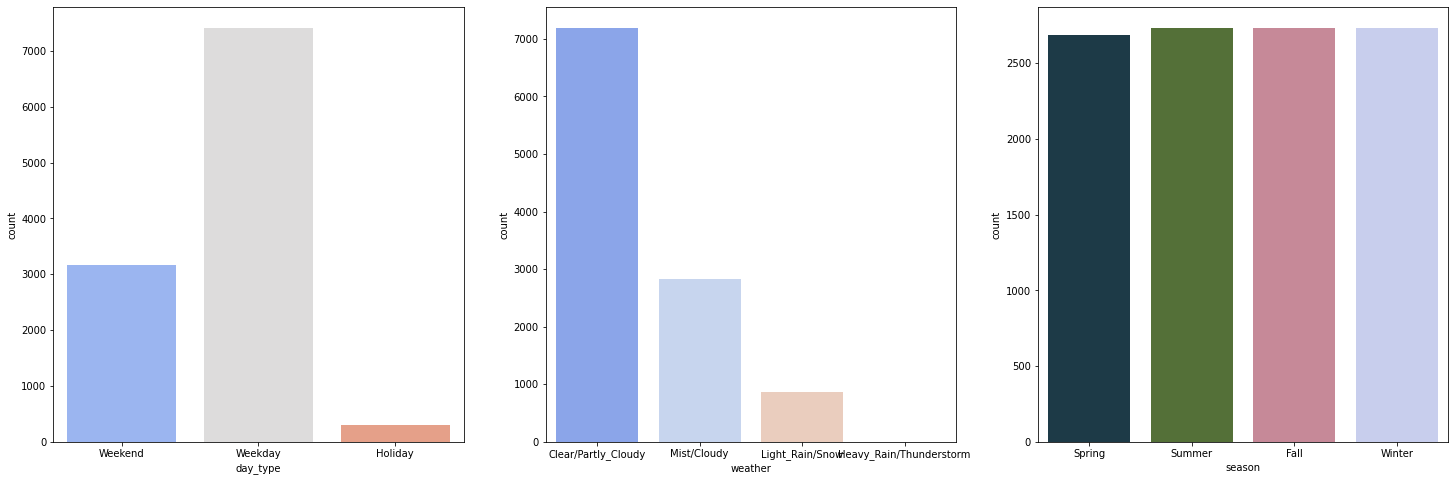

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (25,8))

sns.countplot(data = df, x = 'day_type', palette = 'coolwarm', ax = ax[0])
sns.countplot(data = df, x = 'weather', palette = 'coolwarm', ax = ax[1])
sns.countplot(data = df, x = 'season', palette = 'cubehelix', ax = ax[2])

plt.show()

# Insights
# Sample data contains maximum rental bikes being used in the Weekday, followed by Weekend and very few datapoints for Holiday.
# Bikes rented were mostly used in the clear, mist or cloudy weather. 
# Bikes were rented almost equally across all the 4 seasons.

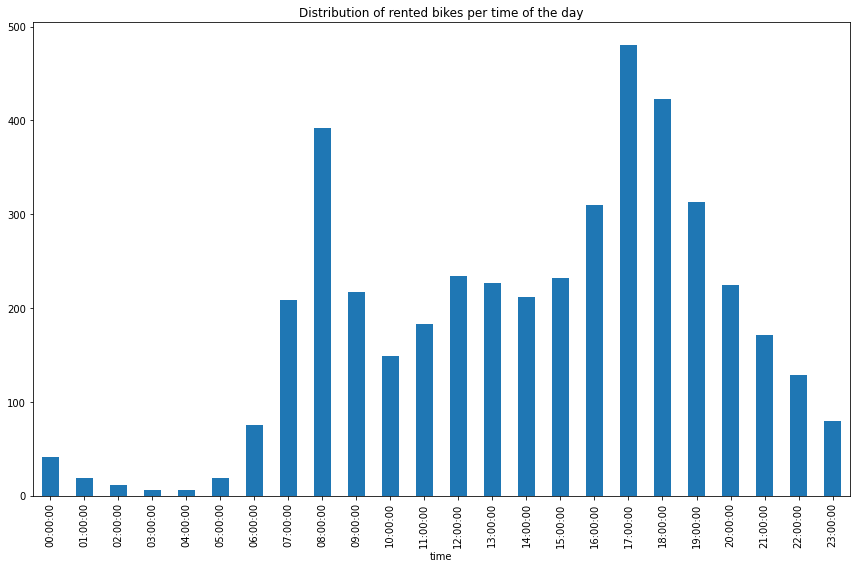

In [ ]:
fig = plt.figure() 
fig.set_size_inches(12, 8)
time_info = df.groupby('time')['count'].median()
time_info.plot(kind = 'bar', title = 'Distribution of rented bikes per time of the day')

plt.show()

# Insights
# Bikes are mostly rented from 07:00 to 09:00 in the morning and 16:00 to 19:00 in the evening.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (25,8))
fig.subplots_adjust(hspace=2, wspace=0.5)
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(data = df, x = 'count', y = 'day_type', orient = 'h', palette="flare", ax = ax[0])
sns.boxplot(data = df, x = 'count', y = 'weather', palette="flare", ax = ax[1])
sns.boxplot(data = df, x = 'count', y = 'season', palette="flare", ax = ax[2])

plt.show()

# Insights
# The median count for rental bikes is below 200 per day for weekdya, weekend and holidays. There are weekdays when the count even crosses 600 going uptil 970 rental bikes a day. The maximum count during weekend and holidays goes up till 700.
# Customers like to use the rental service when the weather is clear. Total count decreases durinf mist/cloudy or ligh rain/snow weather. Customers do not use the service during heavy rain/thunderstorm.
# Customers like to use the rental service during fall, followed by Summer/Winter and the least in Spring.

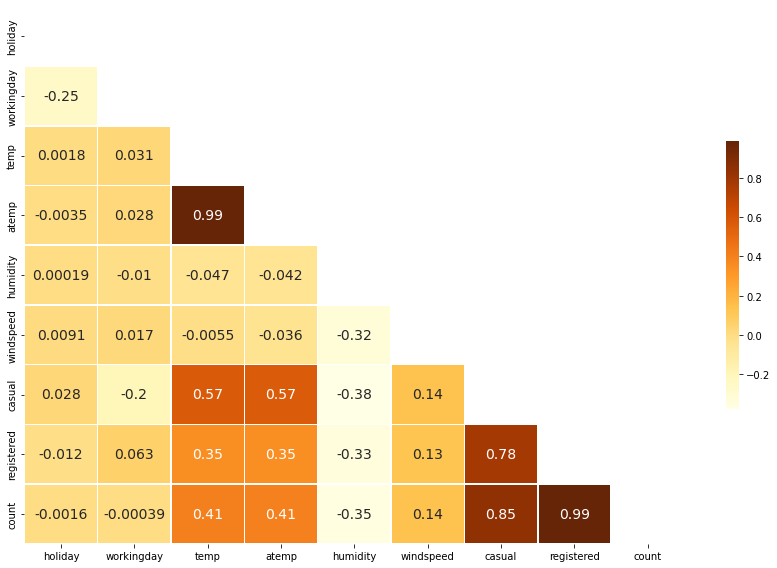

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask = mask, annot = True, annot_kws = {'size': 14}, linewidths=.5, cmap="YlOrBr", cbar_kws={"shrink": .5})

plt.show()

# Insights:
# Target variable, count, is highly correlated (negative) to humidity. Hypothesis - When the humidity increases, people tend to not go out much and hence don't rent the bikes.

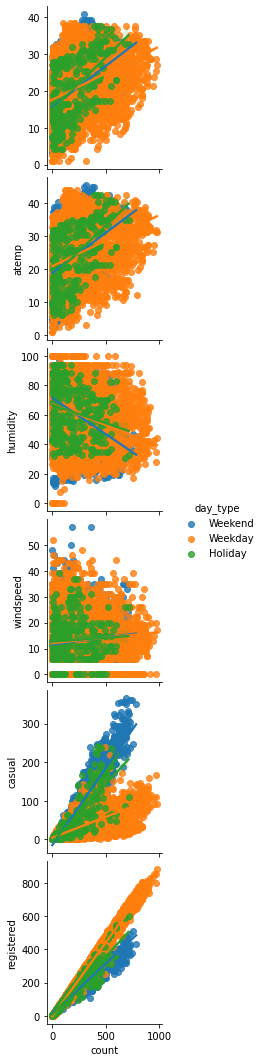

In [ ]:
sns.pairplot(df, 
            y_vars=["temp", "atemp", "humidity", "windspeed", "casual", "registered"],
            x_vars=["count"],
            hue = 'day_type',
            kind = 'reg', 
            corner = True)

plt.show()

# Insights:
# Casual riders rent more during weekends and holidays. Registered riders tend to use the bike more durinf weekdays.
# Count of rental bikes increase as temp and atemp increase, more so during weekdays.

#**Hypothesis testing**


---

#2 Sample T-test

To check if Working Day has an effect on the number of electric cycles rented
Since we have two separate independent groups, 2 sample t-test is the appropriate test for this analysis. 

*Hypothesis Formulation*

H0 --> Count of electric cycles rented on working days and non-working days is equal

H1 --> Count of electric cycles rented on working days and non-working days is not equal

Significance level (α) = 0.05

In [ ]:
# Sample1 - count of electric cycles on working days
working_day_counts = df.loc[df['workingday'] == 1]['count'].reset_index()
working_day_counts.drop(['index'], axis = 1, inplace = True)
working_day_counts.T

,0,1,2,3,4,5,6,7,8,9,...,7402,7403,7404,7405,7406,7407,7408,7409,7410,7411
count,5,2,1,3,30,64,154,88,44,51,...,218,237,334,562,569,336,241,168,129,88


In [ ]:
# Sample2 - count of electric cycles on non-working days
non_working_day_counts = df.loc[df['workingday'] == 0]['count'].reset_index()
non_working_day_counts.drop(['index'], axis = 1, inplace = True)
non_working_day_counts.T

,0,1,2,3,4,5,6,7,8,9,...,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473
count,16,40,32,13,1,1,2,3,8,14,...,310,338,400,243,107,109,122,106,89,33


Assumptions

---

1. Data in each group are normally distributed.
2. The variances for the two independent groups are equal.

In [ ]:
print(np.var(working_day_counts)) 
print(np.var(non_working_day_counts))

# Variance for both the groups is almost equal

count    34040.697107
dtype: float64
count    30171.346099
dtype: float64


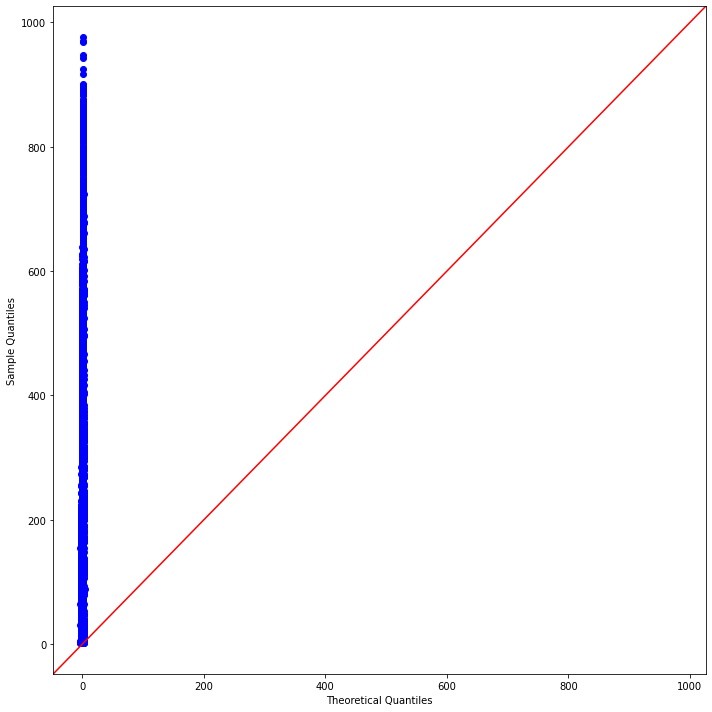

In [ ]:
sm.qqplot(working_day_counts, line ='45')

py.show()

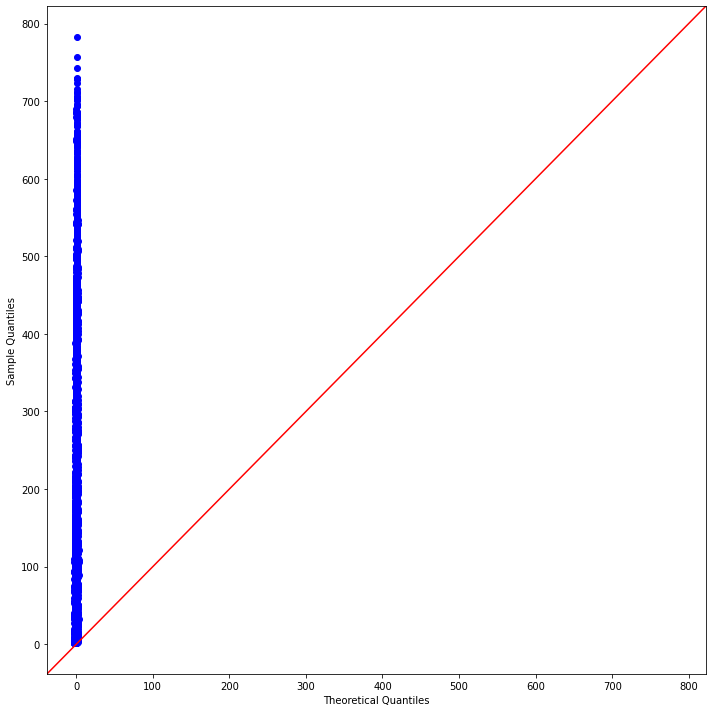

In [ ]:
sm.qqplot(non_working_day_counts, line ='45')

py.show()

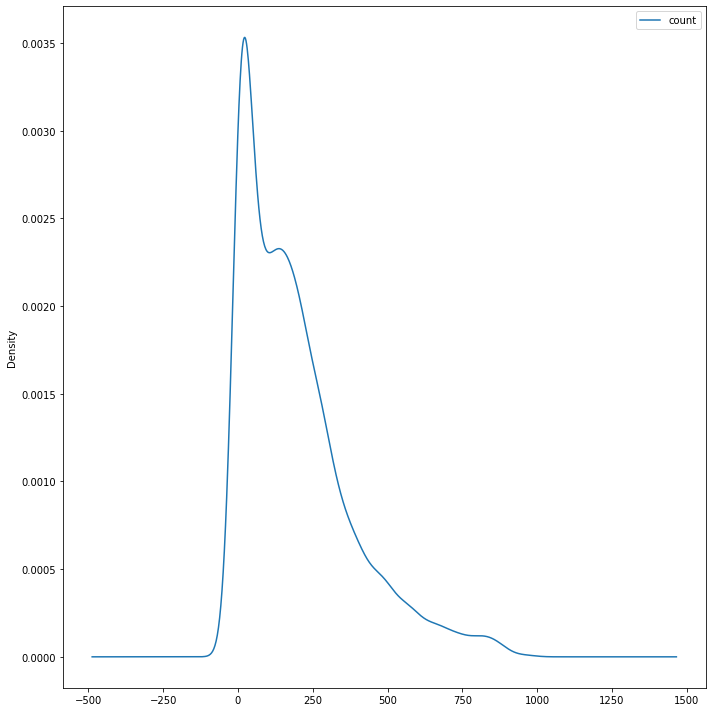

In [ ]:
working_day_counts.plot(kind = 'kde')
plt.show()

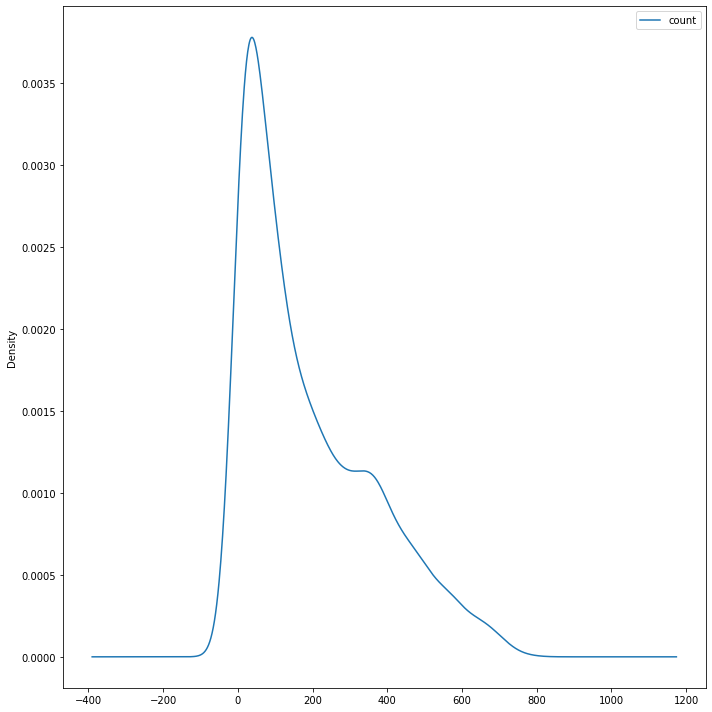

In [ ]:
non_working_day_counts.plot(kind = 'kde')
plt.show()

From above graphs, it is evident that the sample groups aren't normally distributed. 

However, we will still go ahead and perform the tests.

In [ ]:
# Calculate p_value
p_value = stats.ttest_ind(a=working_day_counts, b=non_working_day_counts)[1]
p_value

array([0.22644804])

Since, p_value is higher than α, we fail to reject the null hypothesis.

Which means, there is no evidence to believe that the count of electic cycles rented on working days and non-working days are different.

#ANOVA

To check if No. of cycles rented is similar or different in different:

a) weather

b) season

Since we have multiple weather and season, ANOVA is the appropriate test for this analysis. 

*Hypothesis Formulation*

H0 --> Count of cycles rented is similar in different weather/season

H1 --> Count of cycles rented is different in different weather/season

Significance level (α) = 0.05

In [ ]:
from scipy.stats import f_oneway

a = df.loc[df['weather'] == 'Clear/Partly_Cloudy']['count'].values
b = df.loc[df['weather'] == 'Mist/Cloudy']['count'].values
c = df.loc[df['weather'] == 'Light_Rain/Snow']['count'].values
d = df.loc[df['weather'] == 'Heavy_Rain/Thunderstorm']['count'].values
    
f_oneway(a, b, c, d)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

a)

Since, p_value is lower than α, we reject the null hypothesis.

Which implies that the count of cycles rented is indeed affected by different weathers.

In [ ]:
a = df.loc[df['season'] == 'Spring']['count'].values
b = df.loc[df['season'] == 'Summer']['count'].values
c = df.loc[df['season'] == 'Fall']['count'].values
d = df.loc[df['season'] == 'Winter']['count'].values
    
f_oneway(a, b, c, d)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

b)

Since, p_value is lower than α, we reject the null hypothesis.

Which implies that the count of cycles rented is indeed affected by different seasons.

#Chi-square test

To check if Weather is dependent on the season 

Since weather and season are two categorical variables, Chi-square is the appropriate test for this analysis.

*Hypothesis Formulation*

H0 --> Season and weather is independent

H1 --> Season and weather is dependent

Significance level (α) = 0.05

In [ ]:
from scipy.stats import chi2_contingency
data = pd.crosstab(index=df['season'], columns=df['weather'], margins=True, margins_name= "Total") 
stat, p, dof, expected = chi2_contingency(data)
print(p)

3.1185273325126814e-05


Since, p_value is lower than α, we reject the null hypothesis.

Which implies that weather is indeed dependent on the season.